In [1]:
import requests
from dotenv import load_dotenv
import os

_ = load_dotenv()

GH_USER = os.environ["GH_USERNAME"]
GH_TOKEN = os.environ["GH_TOKEN"]

In [2]:
import pandas as pd

full_repo_model_df = pd.read_csv('UMLFiles_List_V2.0.csv')
full_repo_model_df

,Project,Model Link - Github
0,0-complexity/ovcdoc_public/,https://www.github.com/0-complexity/ovcdoc_pub...
1,0003088/libelektra-qt-gui-test/,https://www.github.com/0003088/libelektra-qt-g...
2,00s/deadman/,https://www.github.com/00s/deadman/tree/master...
3,01db0y/ImageUploader/,https://www.github.com/01db0y/ImageUploader/tr...
4,01db0y/ShareIt/,https://www.github.com/01db0y/ShareIt/tree/mas...
...,...,...
93602,yotomyoto/301_assignment1/,https://www.github.com/yotomyoto/301_assignmen...
93603,zeronero13/af6/,https://www.github.com/zeronero13/af6/tree/mas...
93604,zeronero13/happehardver/,https://www.github.com/zeronero13/happehardver...
93605,Akshit-/ClientServerCommunication/,https://www.github.com/Akshit-/ClientServerCom...


In [3]:
full_repo_df = full_repo_model_df.drop(columns=['Model Link - Github']).drop_duplicates(ignore_index=True)
full_repo_df

,Project
0,0-complexity/ovcdoc_public/
1,0003088/libelektra-qt-gui-test/
2,00s/deadman/
3,01db0y/ImageUploader/
4,01db0y/ShareIt/
...,...
24725,vectorxiang/vectorxiang.github.io/
24726,victorsndvg/FPL/
24727,wmde/FundraisingFrontend/
24728,yotomyoto/301_assignment1/


In [4]:
def get_star_count(repo_name):
    try:
        r = requests.get('https://api.github.com/repos/{}'.format(repo_name), auth=(GH_USER, GH_TOKEN), timeout=60)
        r.raise_for_status()
    except requests.exceptions.RequestException as e:
        print(r.headers['X-RateLimit-Remaining'])
        print(r.headers['X-RateLimit-Reset'])
        return None

    return r.json().get('stargazers_count')

In [5]:
print(f"No. of stars: {get_star_count('zakipauzi/concept-domain-coverage/'[:-1])}")

No. of stars: 2


In [6]:
def repo_exists(repo_name):
    try:
        r = requests.get(f'https://api.github.com/repos/{repo_name}', auth=(GH_USER, GH_TOKEN), timeout=60)
        return r.status_code == 200
    except requests.exceptions.RequestException as e:
        print(f'Error: {e}')
        return False

In [7]:
from tqdm import tqdm
from concurrent.futures import ThreadPoolExecutor

tqdm.pandas()

def add_repo_exist(df):
    def fetch_exist(repo):
        return repo_exists(repo[:-1])

    with ThreadPoolExecutor(max_workers=50) as executor:
        df['Exists'] = list(tqdm(executor.map(fetch_exist, df['Project']), total=len(df['Project'])))
    return df

In [ ]:
full_repo_df = add_repo_exist(full_repo_df)

In [ ]:
full_repo_df = full_repo_df[full_repo_df['Exists']]
full_repo_df.to_csv('full_repo_df.csv', index=False)

In [10]:
full_repo_df.head()

,Project,Exists
1,0003088/libelektra-qt-gui-test/,True
2,00s/deadman/,True
3,01db0y/ImageUploader/,True
4,01db0y/ShareIt/,True
5,01org/vmf/,True


In [11]:
full_repo_df.tail()

,Project,Exists
23805,xeguh83/8Puzzle/,True
23807,xen2/SharpLang/,True
23808,Xennis/graphical_model_editor/,True
23809,xenodium/xenodium.github.io/,True
23810,XenofoR/PAQ/,True


### Get GH projects with UML files

In [8]:
full_repo_df = pd.read_csv('full_repo_df.csv').drop(columns=['Exists'])
full_repo_df

,Project
0,0003088/libelektra-qt-gui-test/
1,00s/deadman/
2,01db0y/ImageUploader/
3,01db0y/ShareIt/
4,01org/vmf/
...,...
6868,xeguh83/8Puzzle/
6869,xen2/SharpLang/
6870,Xennis/graphical_model_editor/
6871,xenodium/xenodium.github.io/


### Check if repo is active

In [9]:
from concurrent.futures import ThreadPoolExecutor

def get_last_activity(repo_name):
    try:
        r = requests.get(f'https://api.github.com/repos/{repo_name}', auth=(GH_USER, GH_TOKEN), timeout=60)
        r.raise_for_status()
    except requests.exceptions.RequestException as e:
        print(f'Error: {e}')
        return None

    return r.json().get('updated_at')

def add_last_activity(df):
    def fetch_last_activity(repo):
        return get_last_activity(repo[:-1])

    with ThreadPoolExecutor(max_workers=50) as executor:
        df['Last_Activity'] = list(tqdm(executor.map(fetch_last_activity, df['Project']), total=len(df['Project'])))
    return df

In [10]:
# full_repo_active_df = add_last_activity(full_repo_df)
# full_repo_active_df

In [11]:
from datetime import datetime, timedelta
import pytz

# Filter for projects with last activity within the last year
# one_year_ago = datetime.now(pytz.UTC) - timedelta(days=365)
# full_repo_active_df['Last_Activity'] = pd.to_datetime(full_repo_active_df['Last_Activity'])
# full_repo_active_df = full_repo_active_df[full_repo_active_df['Last_Activity'] >= one_year_ago]

full_repo_active_df = pd.read_csv('full_repo_active_df.csv')
full_repo_active_df

,Project,Last_Activity
0,0416354917/COMP6442/,2024-06-08 05:46:58+00:00
1,3electrons/AnalogWidgets/,2024-03-11 02:32:07+00:00
2,4dnucleome/cog-abm/,2024-08-09 17:24:23+00:00
3,Aapzu/super-duper-pentago/,2024-04-24 19:13:20+00:00
4,aarondunn/bugkick/,2024-01-10 13:58:30+00:00
...,...,...
529,wwivbbs/wwiv/,2024-11-02 15:11:04+00:00
530,wwj718/wwj718.github.io/,2024-11-14 06:45:00+00:00
531,wyon/note/,2024-08-23 06:52:12+00:00
532,xen2/SharpLang/,2024-10-18 19:10:08+00:00


In [12]:
from tqdm import tqdm
from concurrent.futures import ThreadPoolExecutor

def get_contributor_count(repo_name, limit_hit):
    try:
        r = requests.get(f'https://api.github.com/repos/{repo_name}/contributors', auth=(GH_USER, GH_TOKEN), timeout=60)
        r.raise_for_status()
    except requests.exceptions.RequestException as e:
        print(f'Error: {e}')
        print(r.headers)
        return None

    return len(r.json())

def add_contributor_count(df):
    
    limit_hit = False

    def fetch_contributors(repo):
        return get_contributor_count(repo[:-1], limit_hit)

    tqdm.pandas()
    with ThreadPoolExecutor(max_workers=50) as executor:
        df['Contributors'] = list(tqdm(executor.map(fetch_contributors, df['Project']), total=len(df['Project'])))
    return df

# repo_contrib_df_1 = add_contributor_count(full_repo_df)

In [13]:
from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm

def add_stargazer_count(df):
    def fetch_stargazers(repo):
        return get_star_count(repo[:-1])

    tqdm.pandas()
    with ThreadPoolExecutor(max_workers=50) as executor:
        df['Stargazers'] = list(tqdm(executor.map(fetch_stargazers, df['Project']), total=len(df['Project'])))
    return df

In [14]:
repo_df = pd.read_csv('repo_master_df.csv')
repo_df

,Project,Last_Activity,Contributors,Stargazers
0,4dnucleome/cog-abm/,2024-08-09 17:24:23+00:00,3.0,6.0
1,Aapzu/super-duper-pentago/,2024-04-24 19:13:20+00:00,2.0,0.0
2,aarondunn/bugkick/,2024-01-10 13:58:30+00:00,6.0,118.0
3,abarbour/psd/,2023-12-22 22:40:16+00:00,2.0,9.0
4,abego/treelayout/,2024-09-12 04:35:38+00:00,2.0,92.0
...,...,...,...,...
529,wooknight/phpcallgraph/,2024-11-14 12:20:17+00:00,1.0,38.0
530,wp-plugins/richtexteditor/,2024-03-01 14:57:10+00:00,0.0,0.0
531,wristware/iso8583/,2023-11-27 20:23:59+00:00,1.0,3.0
532,wwj718/wwj718.github.io/,2024-11-14 06:45:00+00:00,1.0,12.0


In [15]:
models_df = repo_df.merge(full_repo_model_df, on='Project', how='left')
models_df.to_csv('models_df.csv', index=False)
models = models_df['Model Link - Github'].tolist()
models = [x.split('.')[-1] for x in models]
models = list(set(models))
models

['bmp', 'png', 'svg', 'jpeg', 'jpg', 'uml', 'gif', 'xmi']

In [16]:
from tqdm import tqdm
from concurrent.futures import ThreadPoolExecutor

def get_graphic_files(repo_name, path=''):
    try:
        r = requests.get(f'https://api.github.com/repos/{repo_name}/contents/{path}', auth=(GH_USER, GH_TOKEN), timeout=60)
        r.raise_for_status()
    except requests.exceptions.RequestException as e:
        # print("Remaining: " + r.headers['X-RateLimit-Remaining'])
        with open('rate_limit_log.txt', 'w') as f:
            f.write("Time reset: " + r.headers['X-RateLimit-Reset'] + '\n')
        return ['Failed']

    files = r.json()
    graphic_files = []
    
    for file in files:
        if file['type'] == 'file' and file['name'].lower().endswith(('jpg', 'gif', 'jpeg', 'bmp', 'svg', 'xmi', 'uml', 'png', 'puml')):
            graphic_files.append(file['path'])
        elif file['type'] == 'dir':
            graphic_files.extend(get_graphic_files(repo_name, file['path']))
    return graphic_files

def add_graphic_files(df):
    def fetch_graphic_files(repo):
        return get_graphic_files(repo[:-1])

    with ThreadPoolExecutor(max_workers=1) as executor:
        df['Graphic_Files'] = list(tqdm(executor.map(fetch_graphic_files, df['Project']), total=len(df['Project'])))
    return df

In [17]:
import time

def process_graphics(repo_df, ctr):

    stop_flag = False

    while not stop_flag:

        print("Processing repo_graphics_df_{}".format(ctr))
        # add graphic files
        repo_df = add_graphic_files(repo_df)

        repo_df.to_csv("repo_graphics_df_{}.csv".format(ctr), index=False)
        print("Saved repo_graphics_df_{}.csv".format(ctr))

        next_repo_df = repo_df[repo_df['Graphic_Files'].apply(lambda x: 'Failed' in x)]
        next_repo_df = pd.concat([next_repo_df.iloc[1:], next_repo_df.iloc[[0]]]).reset_index(drop=True)

        print("Processed {} repositories".format(len(repo_df) - len(next_repo_df)))

        if len(next_repo_df) == 0:
            stop_flag = True
            print("All repositories processed!")
            break
        else:
            repo_df = next_repo_df
            ctr += 1

            print("Sleeping for 25 minutes, now it is {}".format(time.ctime()))
            time.sleep(1500)

In [18]:
import ast

repo_graphics_df = pd.read_csv('repo_graphics_df.csv')
repo_graphics_df['Graphic_Files'] = repo_graphics_df['Graphic_Files'].apply(ast.literal_eval)
# show length
repo_graphics_df['Graphic_Files_Length'] = repo_graphics_df['Graphic_Files'].apply(lambda x: len(x))
repo_graphics_df

,Project,Last_Activity,Contributors,Stargazers,Graphic_Files,Graphic_Files_Length
0,4dnucleome/cog-abm/,2024-08-09 17:24:23+00:00,3.0,6.0,"[AgentClassDiagram.png, SimulationClassDiagram...",4
1,Aapzu/super-duper-pentago/,2024-04-24 19:13:20+00:00,2.0,0.0,[documentation/javalabra/checkstyle/images/rss...,9
2,aarondunn/bugkick/,2024-01-10 13:58:30+00:00,6.0,118.0,"[BugKick.dev.js/bugkick/images/fb_1_azure.png,...",859
3,abarbour/psd/,2023-12-22 22:40:16+00:00,2.0,9.0,"[vignettes/yuml_d.png, vignettes/yuml_n.png]",2
4,abego/treelayout/,2024-09-12 04:35:38+00:00,2.0,92.0,[org.abego.treelayout.demo/src/main/java/org/a...,44
...,...,...,...,...,...,...
484,badqiu/rapid-framework/,2024-07-24 09:58:37+00:00,0.0,36.0,"[images/badqiu_gmail.com_black.jpg, images/bad...",883
485,SnowFox108/NexusCore3/,2024-06-19 10:24:00+00:00,2.0,0.0,[Documentations/NexusCore.Document/Concept/Arc...,1506
486,cacheonix/cacheonix-core/,2024-08-24 13:49:53+00:00,2.0,52.0,[3rdparty/apache-log4j-1.2.15/src/main/java/or...,337
487,apache/wicket/,2024-11-10 21:10:53+00:00,30.0,739.0,[archetypes/quickstart/src/main/resources/arch...,281


In [95]:
repo_graphics_df = repo_graphics_df[repo_graphics_df['Graphic_Files_Length'] > 0].reset_index(drop=True)
repo_graphics_df.to_csv('repo_graphics_df.csv', index=False)
repo_graphics_df

,Project,Last_Activity,Contributors,Stargazers,Graphic_Files,Graphic_Files_Length
0,4dnucleome/cog-abm/,2024-08-09 17:24:23+00:00,3.0,6.0,"[AgentClassDiagram.png, SimulationClassDiagram...",4
1,Aapzu/super-duper-pentago/,2024-04-24 19:13:20+00:00,2.0,0.0,[documentation/javalabra/checkstyle/images/rss...,9
2,aarondunn/bugkick/,2024-01-10 13:58:30+00:00,6.0,118.0,"[BugKick.dev.js/bugkick/images/fb_1_azure.png,...",859
3,abarbour/psd/,2023-12-22 22:40:16+00:00,2.0,9.0,"[vignettes/yuml_d.png, vignettes/yuml_n.png]",2
4,abego/treelayout/,2024-09-12 04:35:38+00:00,2.0,92.0,[org.abego.treelayout.demo/src/main/java/org/a...,44
...,...,...,...,...,...,...
484,badqiu/rapid-framework/,2024-07-24 09:58:37+00:00,0.0,36.0,"[images/badqiu_gmail.com_black.jpg, images/bad...",883
485,SnowFox108/NexusCore3/,2024-06-19 10:24:00+00:00,2.0,0.0,[Documentations/NexusCore.Document/Concept/Arc...,1506
486,cacheonix/cacheonix-core/,2024-08-24 13:49:53+00:00,2.0,52.0,[3rdparty/apache-log4j-1.2.15/src/main/java/or...,337
487,apache/wicket/,2024-11-10 21:10:53+00:00,30.0,739.0,[archetypes/quickstart/src/main/resources/arch...,281


### Sample -- 10%

In [24]:
sampled_repo_graphics_df = repo_graphics_df.sample(frac=0.1, random_state=42).reset_index(drop=True)
sampled_repo_graphics_df

,Project,Last_Activity,Contributors,Stargazers,Graphic_Files,Graphic_Files_Length
0,sprossiter/JSIT/,2024-08-26 23:12:56+00:00,1.0,2.0,[src/main/resources/docs/diagrams/alAddDepende...,6
1,baidu/broc/,2024-10-25 16:02:35+00:00,4.0,100.0,"[doc/dependent_relationship.jpg, doc/flowchart...",3
2,telldus/telldus/,2024-09-09 12:44:16+00:00,10.0,64.0,[telldus-gui/3rdparty/qtsingleapplication/doc/...,106
3,Splamy/TS3AudioBot/,2024-11-14 13:01:16+00:00,12.0,698.0,"[TS3AudioBot/Media/SleepingKitty.png, TS3Audio...",5
4,benmfaul/XRTB/,2024-05-17 07:27:22+00:00,1.0,121.0,"[src/Test.uml, src/com/xrtb/bidder/CampaignPro...",54
5,andrenho/perminal/,2024-11-09 16:47:23+00:00,1.0,0.0,"[.old/cpp/frontend/latin1.png, .old/rust/data/...",4
6,borman/phoneme-qtopia/,2024-11-03 10:35:55+00:00,2.0,11.0,[cldc/src/tools/memprof_client/doc/vm_memprof_...,490
7,aplgithub/haikudepotserver/,2024-11-09 13:06:22+00:00,17.0,18.0,"[docs/images/img-architectureoverview.png, doc...",65
8,athiasjerome/XORCISM/,2024-06-19 18:25:44+00:00,1.0,23.0,[Documentation/XORCISM_Architecture_Overview_T...,3
9,tazzledazzle/UW-CSS/,2024-03-02 12:42:33+00:00,1.0,4.0,"[343/lab4/lab4classUML.jpg, 490/assignment1/33...",1257


In [25]:
sampled_repo_graphics_df['Graphic_Files_Length'].sum()

18577

### Check if graphics is UML class diagram

In [27]:
from openai import OpenAI
client = OpenAI()

def check_uml(image_url):
    try:
        response = client.chat.completions.create(
            model="gpt-4o-mini",
            messages=[{"role": "system", 
                    "content": "You are an AI assistant helping a user to determine if the image, which is a graphic in a Github link, is a UML diagram." \
                        "If the graphic is a UML class diagram, answer with 'Yes 1.00'. If the graphic is not a UML diagram, answer with 'No 1.00'. The '1.00' means you are 100 percent confident." \
                        "If you are unsure, answer with 'Maybe' and assign a confidence score. For example, 'Maybe 0.75': means you are 75 percent confident." \
                        "Image link: {}".format(image_url)}],
            temperature=0,
            max_tokens=2048,
            top_p=1,
            seed=0,
            frequency_penalty=0,
            presence_penalty=0
        )
    except Exception as e:
        print(f"Error: {e}")
        return "Failed"

    return response.choices[0].message.content

In [28]:
image_url = 'https://raw.githubusercontent.com/0003088/libelektra-qt-gui-test/master/doc/images/circle.jpg'
result = check_uml(image_url)
print(result)

No 1.00


In [29]:
def check_uml_files(df):
    def check_files(files, project):
        results = []
        for file in tqdm(files, desc=f"Checking files in {project}"):
            file_url = f'https://raw.githubusercontent.com/{project[:-1]}/master/{file}'
            result = check_uml(file_url)
            results.append(result)
        return results

    df['UML_Check'] = df.apply(lambda row: check_files(row['Graphic_Files'], row['Project']), axis=1)
    return df

In [31]:
sampled_repo_graphics_df = sampled_repo_graphics_df.head(1).copy()
repo_graphics_check_df = check_uml_files(sampled_repo_graphics_df)
repo_graphics_check_df

Checking files in sprossiter/JSIT/: 100%|██████████| 6/6 [00:03<00:00,  1.97it/s]


,Project,Last_Activity,Contributors,Stargazers,Graphic_Files,Graphic_Files_Length,UML_Check
0,sprossiter/JSIT/,2024-08-26 23:12:56+00:00,1.0,2.0,[src/main/resources/docs/diagrams/alAddDepende...,6,"[No 1.00, No 1.00, No 1.00, Yes 1.00, Yes 1.00..."


In [33]:
def filter_uml_files(df):
    def filter_files(files, checks):
        return [file for file, check in zip(files, checks) if check != 'No 1.00']

    df['Filtered_Graphic_Files'] = df.apply(lambda row: filter_files(row['Graphic_Files'], row['UML_Check']), axis=1)
    df['Filtered_Graphic_Files_Length'] = df['Filtered_Graphic_Files'].apply(len)
    return df[df['Filtered_Graphic_Files_Length'] > 0].reset_index(drop=True)

filtered_repo_graphics_check_df = filter_uml_files(repo_graphics_check_df)
filtered_repo_graphics_check_df = filtered_repo_graphics_check_df.drop(columns=['UML_Check'])
filtered_repo_graphics_check_df

,Project,Last_Activity,Contributors,Stargazers,Graphic_Files,Graphic_Files_Length,Filtered_Graphic_Files,Filtered_Graphic_Files_Length
0,sprossiter/JSIT/,2024-08-26 23:12:56+00:00,1.0,2.0,[src/main/resources/docs/diagrams/alAddDepende...,6,[src/main/resources/docs/diagrams/jsitUsageCla...,2


In [ ]:
repo_contrib_graphics_check_df['UML_Check_Count'] = repo_contrib_graphics_check_df['UML_Check'].apply(lambda x: len(x))
repo_contrib_graphics_check_df.to_csv('repo_contrib_graphics_check_df.csv', index=False)
repo_contrib_graphics_check_df.drop(columns=['Graphic_Files_Count', 'UML_Check_Count'], inplace=True)
repo_contrib_graphics_check_df

,Project,Contributors,Graphic_Files,UML_Check
0,0003088/libelektra-qt-gui-test/,12.0,"[doc/images/circle.jpg, doc/images/circle.svg,...","[No 1.00, No 1.00, No 1.00, No 1.00, Yes 1.00,..."
1,01org/vmf/,11.0,[3rdparty/xmp/docs/API/TXMPFiles_8incl__cpp__i...,"[No 1.00, No 1.00, No 1.00, No 1.00, No 1.00, ..."
2,080419android/scheduler/,3.0,"[Design/Wireframes/Add Schedule.png, Design/Wi...","[No 1.00, No 1.00, No 1.00, No 1.00, No 1.00, ..."
3,0877624/0877624-0896919-0894785/,3.0,"[DesPat/Content/Banana.png, DesPat/Content/Gra...","[No 1.00, No 1.00, Yes 1.00, Yes 1.00, Yes 1.0..."
4,09421/Track-A-Bus/,2.0,[1 - Systemdesign/1 - Ikke-samlede docs/Diagra...,"[Yes 1.00, No 1.00, No 1.00, No 1.00, No 1.00,..."
5,100Continue/Gulu--web-server-test-tools/,2.0,"[doc/FileHandlerUML.jpg, doc/ProcessHandlerUML...","[Yes 1.00, Yes 1.00, Yes 1.00, Yes 1.00, Yes 1..."
6,101companies/101repo/,24.0,"[concepts/Spaghetti_code/figure.jpg, contribut...","[No 1.00, Yes 1.00, Yes 1.00, No 1.00, No 1.00..."
7,131213web/ProjectTask/,9.0,"[tasks/task04/activity_diagram1.png, tasks/tas...","[Yes 1.00, Yes 1.00, Yes 1.00, No 1.00, No 1.0..."
8,1string2boolthem/ProjectHub/,4.0,[Documentation/Project Diagrams/Sequence Diagr...,"[No 1.00, No 1.00, No 1.00, No 1.00, No 1.00, ..."
9,211tbc/synthesis/,4.0,"[docs/UML/ClassDiagram.png, docs/UML/SequenceD...","[Yes 1.00, Yes 1.00, Yes 1.00, Yes 1.00, No 1...."


In [ ]:
repo_contrib_graphics_check_df['UML_Files'] = repo_contrib_graphics_check_df.apply(
    lambda row: [file for file, check in zip(row['Graphic_Files'], row['UML_Check']) if check.startswith('Yes') or check.startswith('Maybe')],
    axis=1
)
repo_contrib_graphics_check_df['UML_Files_Count'] = repo_contrib_graphics_check_df['UML_Files'].apply(lambda x: len(x))
repo_contrib_graphics_check_df.drop(columns=['Graphic_Files', 'UML_Check'], inplace=True)
repo_contrib_graphics_check_df.to_csv('repo_contrib_graphics_check_df.csv', index=False)
repo_contrib_graphics_check_df

,Project,Contributors,UML_Files,UML_Files_Count
0,0003088/libelektra-qt-gui-test/,12.0,"[doc/images/classes.png, doc/images/classes_la...",3
1,01org/vmf/,11.0,[docs/design/LLD.uml],1
2,080419android/scheduler/,3.0,[Requirements/080419A - ClassDiagram_v_1_0_0.png],1
3,0877624/0877624-0896919-0894785/,3.0,"[DesPat/Content/Life-0.png, DesPat/Content/Lif...",5
4,09421/Track-A-Bus/,2.0,[1 - Systemdesign/1 - Ikke-samlede docs/Diagra...,52
5,100Continue/Gulu--web-server-test-tools/,2.0,"[doc/FileHandlerUML.jpg, doc/ProcessHandlerUML...",6
6,101companies/101repo/,24.0,"[contributions/argoUML/composition.jpg, contri...",5
7,131213web/ProjectTask/,9.0,"[tasks/task04/activity_diagram1.png, tasks/tas...",6
8,1string2boolthem/ProjectHub/,4.0,[Documentation/Project Diagrams/Sequence Diagr...,8
9,211tbc/synthesis/,4.0,"[docs/UML/ClassDiagram.png, docs/UML/SequenceD...",7


In [62]:
def get_lines_of_code(repo_name):
    try:
        r = requests.get(f'https://api.github.com/repos/{repo_name}/languages', auth=(GH_USER, GH_TOKEN), timeout=60)
        r.raise_for_status()
    except requests.exceptions.RequestException as e:
        print(f'Error: {e}')
        return None

    languages = r.json()
    total_lines = sum(languages.values())
    return total_lines

def add_lines_of_code(df):
    df['Lines_of_Code'] = df['Project'].apply(lambda repo: get_lines_of_code(repo[:-1]))
    return df

repo_contrib_graphics_df = add_lines_of_code(repo_contrib_graphics_df)
repo_contrib_graphics_df.to_csv('repo_contrib_graphics_df_with_loc.csv', index=False)
repo_contrib_graphics_df

,Project,Contributors,UML_Files,UML_Files_Count,Lines_of_Code
0,0003088/libelektra-qt-gui-test/,12.0,"[doc/images/classes.png, doc/images/classes_la...",3,4679395
1,01org/vmf/,11.0,[docs/design/LLD.uml],1,1383431
2,080419android/scheduler/,3.0,[Requirements/080419A - ClassDiagram_v_1_0_0.png],1,232249
3,0877624/0877624-0896919-0894785/,3.0,"[DesPat/Content/Life-0.png, DesPat/Content/Lif...",5,66305
4,09421/Track-A-Bus/,2.0,[1 - Systemdesign/1 - Ikke-samlede docs/Diagra...,52,4210616
5,100Continue/Gulu--web-server-test-tools/,2.0,"[doc/FileHandlerUML.jpg, doc/ProcessHandlerUML...",6,203441
6,101companies/101repo/,24.0,"[contributions/argoUML/composition.jpg, contri...",5,11883348
7,131213web/ProjectTask/,9.0,"[tasks/task04/activity_diagram1.png, tasks/tas...",6,157535
8,1string2boolthem/ProjectHub/,4.0,[Documentation/Project Diagrams/Sequence Diagr...,8,84032
9,211tbc/synthesis/,4.0,"[docs/UML/ClassDiagram.png, docs/UML/SequenceD...",7,1811839


In [22]:
import os
import requests
from tqdm import tqdm

def sanitize_folder_name(folder_name):
    return "".join(c if c.isalnum() or c in (' ', '.', '_') else '_' for c in folder_name)

def download_file(url, dest_folder):
    if not os.path.exists(dest_folder):
        os.makedirs(dest_folder, exist_ok=True)
    response = requests.get(url, stream=True)
    file_name = os.path.join(dest_folder, url.split('/')[-1])
    with open(file_name, 'wb') as file:
        for chunk in response.iter_content(1024):
            file.write(chunk)

def download_graphics(df):
    for _, row in tqdm(df.iterrows(), total=df.shape[0]):
        repo_name = row['Project'][:-1]
        graphic_files = row['Graphic_Files']
        sanitized_repo_name = sanitize_folder_name(repo_name)
        for file_path in graphic_files:
            file_url = f'https://raw.githubusercontent.com/{repo_name}/master/{file_path}'
            download_file(file_url, os.path.join('downloaded_graphics', sanitized_repo_name))

download_graphics(repo_contrib_graphics_df)

100%|██████████| 10/10 [18:28<00:00, 110.84s/it]


### Check for UML diagrams

In [ ]:
# check for recall?

In [63]:
repo_contrib_graphics_df_with_loc = pd.read_csv('repo_contrib_graphics_df_with_loc.csv')

In [ ]:
# generate methodolog

In [ ]:
merged_df = repo_contrib_graphics_check_df.merge(full_repo_model_df, on='Project', how='left')
merged_df = merged_df.merge(repo_contrib_graphics_df_with_loc, on='Project', how='left')
merged_df = merged_df.groupby(['Project'])['Model Link - Github'].apply(list).reset_index()

merged_df['Old Models Count'] = merged_df['Model Link - Github'].apply(len)
merged_df.rename(columns={'Model Link - Github': 'Old Models'}, inplace=True)
merged_df = merged_df.merge(repo_contrib_graphics_check_df, on='Project', how='left')

merged_df['Old Models'] = merged_df['Old Models'].apply(lambda models: [model.split('master/')[-1] for model in models])

# Get the ratio of UML files to LOC
merged_df['UML_LOC_Ratio'] = merged_df['UML_Files_Count'] / merged_df['Lines_of_Code']

merged_df.to_csv('merged_models_df.csv', index=False)

merged_df

,Project,Old Models,Old Models Count,Contributors,UML_Files,UML_Files_Count,Lines_of_Code,UML_LOC_Ratio
0,0003088/libelektra-qt-gui-test/,[doc/images/overview_plugins.xmi],1,12.0,"[doc/images/classes.png, doc/images/classes_la...",3,4679395,6.411085e-07
1,01org/vmf/,[docs/design/LLD.uml],1,11.0,[docs/design/LLD.uml],1,1383431,7.228405e-07
2,080419android/scheduler/,[Requirements/080419A - ClassDiagram_v_1_0_0.png],1,3.0,[Requirements/080419A - ClassDiagram_v_1_0_0.png],1,232249,4.305724e-06
3,0877624/0877624-0896919-0894785/,[UML Diagram/ModelDefinition/UML Diagram.uml],1,3.0,"[DesPat/Content/Life-0.png, DesPat/Content/Lif...",5,66305,7.540909e-05
4,09421/Track-A-Bus/,[1 - Systemdesign/1 - Ikke-samlede docs/Diagra...,12,2.0,[1 - Systemdesign/1 - Ikke-samlede docs/Diagra...,52,4210616,1.234974e-05
5,100Continue/Gulu--web-server-test-tools/,"[gulu3.6/doc/FileHandlerUML.jpg, gulu3.6/doc/P...",6,2.0,"[doc/FileHandlerUML.jpg, doc/ProcessHandlerUML...",6,203441,2.949258e-05
6,101companies/101repo/,[contributions/jgralab/101companies-schema.xmi],1,24.0,"[contributions/argoUML/composition.jpg, contri...",5,11883348,4.207568e-07
7,131213web/ProjectTask/,"[tasks/task04/activity_diagram1.png, tasks/tas...",5,9.0,"[tasks/task04/activity_diagram1.png, tasks/tas...",6,157535,3.808677e-05
8,1string2boolthem/ProjectHub/,[Documentation/Project Diagrams/UML Class Diag...,2,4.0,[Documentation/Project Diagrams/Sequence Diagr...,8,84032,9.520183e-05
9,211tbc/synthesis/,"[docs/UML/SequenceDiagram.png, docs/UML/UseCas...",2,4.0,"[docs/UML/ClassDiagram.png, docs/UML/SequenceD...",7,1811839,3.863478e-06


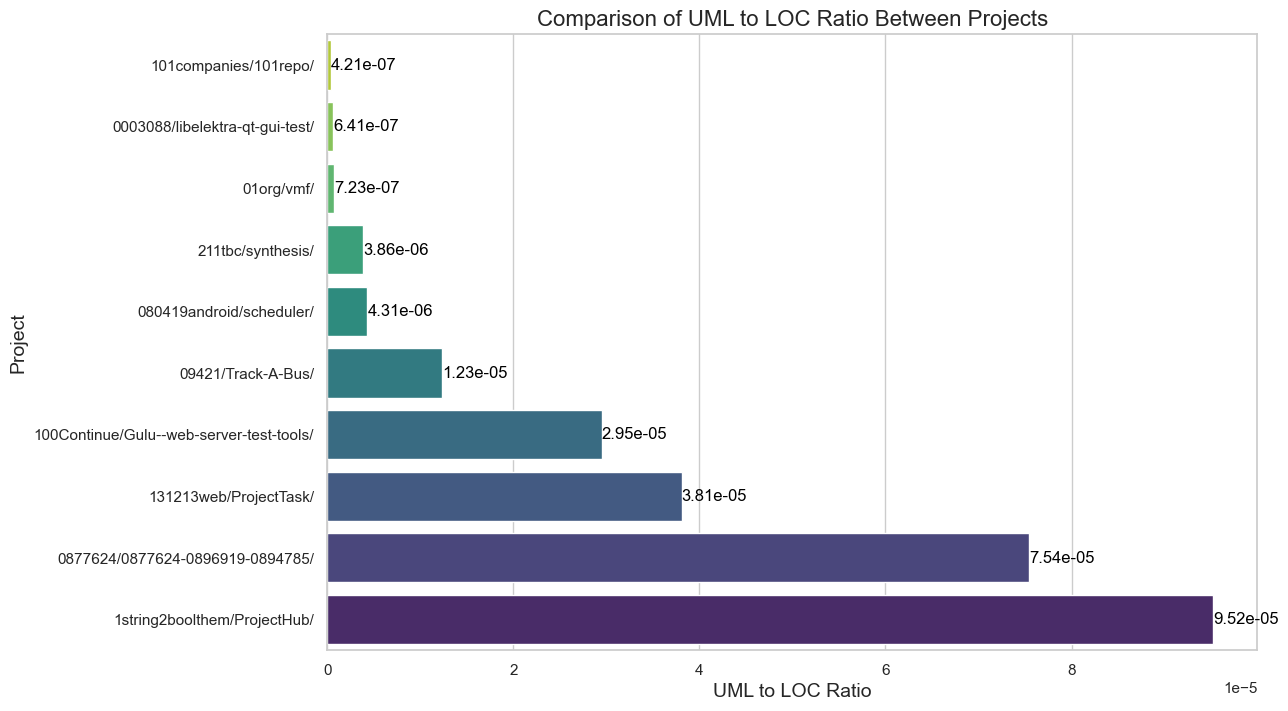

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Sort the dataframe by UML_LOC_Ratio
merged_df_sorted = merged_df.sort_values(by='UML_LOC_Ratio', ascending=False)

# Plot the UML_LOC_Ratio
plt.figure(figsize=(12, 8))
barplot = sns.barplot(
    x='UML_LOC_Ratio', 
    y='Project', 
    data=merged_df_sorted, 
    palette='viridis'
)

# Add labels and title
plt.xlabel('UML to LOC Ratio', fontsize=14)
plt.ylabel('Project', fontsize=14)
plt.title('Comparison of UML to LOC Ratio Between Projects', fontsize=16)

# Add value annotations
for index, value in enumerate(merged_df_sorted['UML_LOC_Ratio']):
    barplot.text(value, index, f'{value:.2e}', color='black', ha="left", va="center")

# Invert y-axis to have the highest ratio at the top
plt.gca().invert_yaxis()

# Show the plot
plt.show()

In [59]:
merged_df['Old Models'].tolist()

[['doc/images/overview_plugins.xmi'],
 ['docs/design/LLD.uml'],
 ['Requirements/080419A - ClassDiagram_v_1_0_0.png'],
 ['UML Diagram/ModelDefinition/UML Diagram.uml'],
 ['1 - Systemdesign/1 - Ikke-samlede docs/Diagrammer/Misc/Use_Case_Diagram.jpg',
  '1 - Systemdesign/3 - 4th/04_Systemdesign/Diagrammer/SSD/UC1 Simple Sequence Diagram.png',
  '1 - Systemdesign/3 - 4th/04_Systemdesign/Diagrammer/SSD/UC1.1 Simple Sequence Diagram.png',
  '1 - Systemdesign/3 - 4th/04_Systemdesign/Diagrammer/SSD/UC1.2 Simple Sequence Diagram.png',
  '1 - Systemdesign/3 - 4th/04_Systemdesign/Diagrammer/Use_Case_Diagram.jpg',
  '2 - Kravspec/2 - Samlet kravspec/Use_Cases/Diagrammer/Use_Case_Diagram.jpg',
  '4 - Rapport/4 semester/Billeder/Use_Case_Diagram.jpg',
  '4 - Rapport/Billeder/Use_Case_Diagram.jpg',
  '7 - Bilag/2 - Diagrammer/3 - Klassediagrammer/Administrator hjemmeside - klassediagram.jpg',
  '7 - Bilag/2 - Diagrammer/3 - Klassediagrammer/Mobil applikation - Klassediagram.jpg',
  '7 - Bilag/2 - Dia

In [60]:
merged_df['UML_Files'].tolist()

[['doc/images/classes.png',
  'doc/images/classes_large.png',
  'doc/images/state.png'],
 ['docs/design/LLD.uml'],
 ['Requirements/080419A - ClassDiagram_v_1_0_0.png'],
 ['DesPat/Content/Life-0.png',
  'DesPat/Content/Life-1.png',
  'DesPat/Content/Life-2.png',
  'DesPat/Content/Life-3.png',
  'UML Diagram/ModelDefinition/UML Diagram.uml'],
 ['1 - Systemdesign/1 - Ikke-samlede docs/Diagrammer/AktOrkontekst-diagram.jpg',
  '1 - Systemdesign/1 - Ikke-samlede docs/Diagrammer/Database/MySQL_UML_Diagram.jpg',
  '1 - Systemdesign/1 - Ikke-samlede docs/Diagrammer/Database/SQLite_UML_Diagram.jpg',
  '1 - Systemdesign/1 - Ikke-samlede docs/Diagrammer/Klassediagrammer/App_klasseDia.jpg',
  '1 - Systemdesign/1 - Ikke-samlede docs/Diagrammer/Klassediagrammer/App_klasseDia_models.jpg',
  '1 - Systemdesign/1 - Ikke-samlede docs/Diagrammer/Klassediagrammer/Hjemmeside_KlasseDia.jpg',
  '1 - Systemdesign/1 - Ikke-samlede docs/Diagrammer/Klassediagrammer/Simulator_klasseDia.jpg',
  '1 - Systemdesign/1 -